In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV, KFold






# Question 1, 2 et 3

In [2]:
def simu(n, alpha, beta, display=True):

    """Simule et affiche un echantillon de taille n.
    Renvoie les jeux d'entrainement/test avec les étiquettes dissociées.
    """

    

    if (alpha>1) | (alpha<0) | (beta>1) | (beta<0):
        raise ValueError('Les paramètres alpha et beta doivent être compris entre 0 et 1.')

    else:
        data=pd.DataFrame(columns=["X1","X2", "Y"])

        for _ in range(n):

            X1=np.random.uniform(0,1)
            X2=np.random.uniform(0,1)
            if abs(X1+2*X2)<=1:
                Y=np.random.binomial(1,alpha)
            else:
                Y=np.random.binomial(1,beta)
            
            data.loc[len(data)] = {'X1':X1, 'X2': X2 ,'Y': Y}
    # graphique data
    if display:
        sns.relplot(data=data, x="X1", y="X2", hue="Y")
    # split data
    x_train, x_test, y_train, y_test=train_test_split(data[["X1","X2"]], data["Y"],  test_size=0.5, random_state=42)
    
    return x_train, x_test, y_train, y_test
    
   

c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

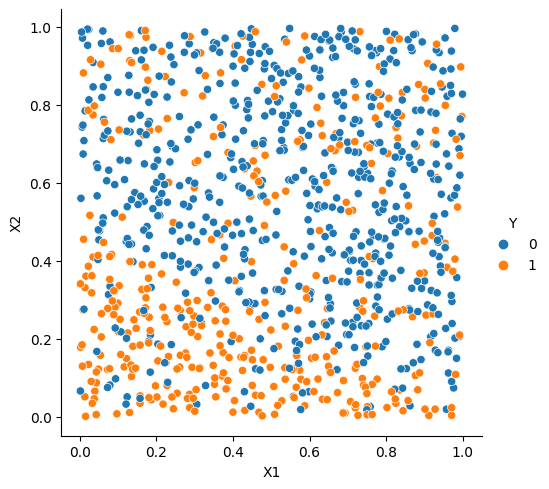

In [3]:
X_train, X_test, y_train, y_test=simu(1000, 0.8, 0.2)


Exercice : programmer "à la main" la fonction train_test_split

In [4]:
def traintestsplitalamain(X,Y,trainsize):
    ## prend en entrée une matrice X de taille n x p
    ## et un vecteur Y de taille n
    ## trainsize désigne la proportion de données attribuées à l'entraînement
    ## renvoie Xtrain, Xtest, Ytrain, Ytest

    
    n = X.shape[0]  # Nombre total d'échantillons
    n_train = int(trainsize * n)  # Nombre d'échantillons dans l'ensemble d'entraînement
    n_test = n - n_train  # Nombre d'échantillons dans l'ensemble de test

    # Générer un index aléatoire pour diviser les données
    indices = np.random.permutation(n)

    # Diviser les données en ensembles d'entraînement et de test
    Xtrain = X[indices[:n_train]]
    Xtest = X[indices[n_train:]]
    Ytrain = Y[indices[:n_train]]
    Ytest = Y[indices[n_train:]]

    return Xtrain, Xtest, Ytrain, Ytest
    
    

# Question 4

Consulter la classe KNeighborsClassifier de sklearn

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.predict([[0.5, 0.5],[1/4, 3/4]]))


[0 0]


c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Question 5, 6, 7 et 8

In [6]:
def evaluate(clf, X_train, X_test, y_train, y_test, display=False):
    # Ecrire une fonction qui permet de :
    # Pour un prédicteur clf fait :
    # "Fitter les données d'entraînement avec clf.fit"
    # "Prédire l'échantillon test avec clf.predict"
    # "Calculer le score avec la fonction accuracy_score"
    # "Tracer un graphe avec les bien classés 0 ou 1 et les mal classés, on pourra utiliser sns.scatterplot"
    # afficher la matrice de confusion
    
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)

    #question 6
    
    y=list(y_test)
    for i in range(len(y_predict)):

        if y_predict[i] != y[i]:
            y[i]=-1
        
    
    
    data=pd.DataFrame( {"X1":list(X_test["X1"]), "X2":list(X_test["X2"]), "y": y})
    #score
    score=clf.score(X_test,y_test)
    #plot_confusion_matrix(y_test, y_predict)
    if display:
        
        sns.relplot(data=data, x="X1", y="X2", hue="y", height=4, aspect=2)
       
     
        # Création du graphique de la matrice de confusion
        cm = confusion_matrix(y_test, y_predict)
        plt.figure(figsize=(6, 4))
        sns.set(font_scale=1.2)  # Ajuster la taille de la police
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'],)

        plt.xlabel('Prédictions')
        plt.ylabel('Vraies étiquettes')
        plt.title('Matrice de Confusion')
       
        plt.show()

    return score


c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

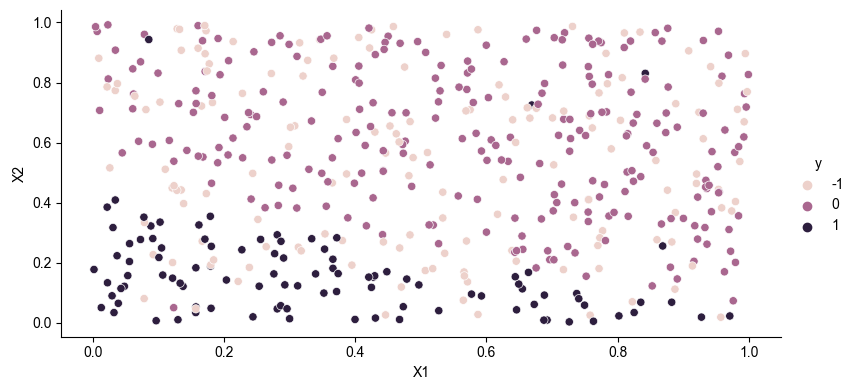

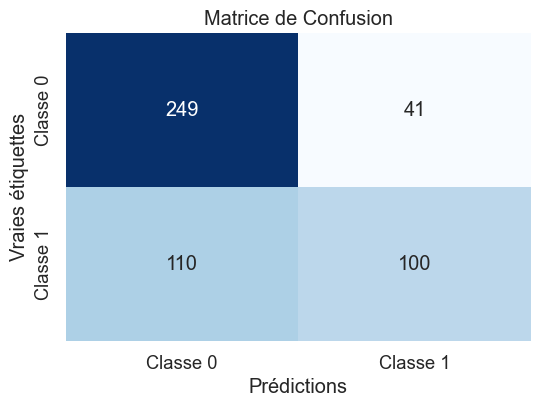

0.698


In [7]:

clf = KNeighborsClassifier(n_neighbors=5)
score= evaluate(clf, X_train, X_test, y_train, y_test, display=True)
print(score)

# Question 9

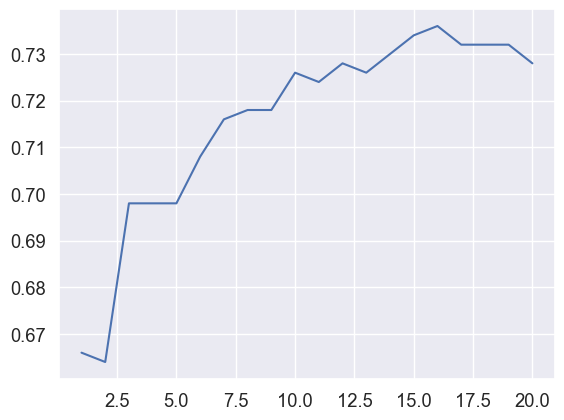

In [8]:
n = range(1, 21)
clfs = [KNeighborsClassifier(n_neighbors=k) for k in n]
scores={}
for i in range(len(clfs)):
    score= evaluate(clfs[i], X_train, X_test, y_train, y_test, display=False)
    scores[i+1]=score
scores  
## Afficher le graphe de l'évolution de l'accuracy
plt.plot(n, scores.values())


In [9]:
scores

{1: 0.666,
 2: 0.664,
 3: 0.698,
 4: 0.698,
 5: 0.698,
 6: 0.708,
 7: 0.716,
 8: 0.718,
 9: 0.718,
 10: 0.726,
 11: 0.724,
 12: 0.728,
 13: 0.726,
 14: 0.73,
 15: 0.734,
 16: 0.736,
 17: 0.732,
 18: 0.732,
 19: 0.732,
 20: 0.728}

In [10]:
print("Best estimator:", KNeighborsClassifier(n_neighbors=max(scores, key=scores.get)))

Best estimator: KNeighborsClassifier(n_neighbors=16)


# Question 11

### LOO

In [11]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))



# Initialiser KNeighborsClassifier
knn = KNeighborsClassifier()

# Initialiser Leave-One-Out (LOO)
loo = LeaveOneOut()

# Variables pour stocker les résultats
errors_loo = []
scores=[]
# Itérer sur les plis LOO
for train_index, test_index in loo.split(X):
    xtrain, xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    # Entraîner le modèle KNeighborsClassifier
    knn.fit(xtrain, ytrain)
    
    # Évaluer l'erreur en utilisant accuracy_score ou toute autre métrique d'erreur appropriée
    accuracy = knn.score(xtest, ytest)  # Vous pouvez utiliser une autre métrique si nécessaire
    scores.append(accuracy)
    error = 1 - accuracy
    
    # Stocker l'erreur dans la liste
    errors_loo.append(error)

# Calculer l'erreur moyenne en LOO
mean_error_loo = np.mean(errors_loo)
print(f'Erreur moyenne par LOO : {mean_error_loo:.4f}')


Erreur moyenne par LOO : 0.2670


In [12]:
print("Mean score:", np.mean(scores))

Mean score: 0.733


### 5-fold

In [13]:
# Initialiser la validation croisée 5-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Paramètres à tester avec GridSearchCV (nombre de voisins k)
param_grid = {'n_neighbors': list(range(1, 21))}

# Initialiser GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kf, scoring='accuracy')

# Effectuer la recherche de grille
clf.fit(X, y)

# Obtenir les résultats de la recherche de grille
best_k = clf.best_params_['n_neighbors']
best_accuracy = clf.best_score_

print(f'Meilleur k avec validation croisée 5-fold : {best_k}')
print(f'Précision correspondante : {best_accuracy:.4f}')

##Utiliser GridSearchcv

print(f"Best parameters: {clf.best_params_} with mean score of {round(clf.best_score_,3)}")

NameError: name 'KFold' is not defined

Exercice : tester avec d'autres métriques, voir https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

# Question 12

In [ ]:
final_clf = clf.best_estimator_
final_clf.fit(X_test, y_test)
y_pred= final_clf.predict(X_test)
print("Final accuracy score:", accuracy_score(y_test, y_pred))




Final accuracy score: 0.756


In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.00040436, 0.00037122, 0.0007956 , 0.00019937, 0.        ,
        0.        , 0.        , 0.00313368, 0.        , 0.        ,
        0.00314231, 0.00315356, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'std_fit_time': array([0.00049533, 0.00045467, 0.00039875, 0.00039873, 0.        ,
        0.        , 0.        , 0.00626736, 0.        , 0.        ,
        0.00628462, 0.00630713, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'mean_score_time': array([0.00608439, 0.00599766, 0.00574985, 0.00355854, 0.0062675 ,
        0.0062387 , 0.00348911, 0.0062552 , 0.00624542, 0.00424666,
        0.00559282, 0.00311308, 0.00626116, 0.00624413, 0.00625882,
        0.00624809, 0.00625086, 0.00625067, 0.00312552, 0.00624948]),
 'std_score_time': array([0.00107985, 0.00014304, 0.00052166, 0.00296261, 0.0076761 ,
        0.00764082, 0.00697823, 0.007661

> Le score final est logiquement proche du score moyen de validation car les échantillon d'entrainement et de test ont été généré avec les mêmes lois.